In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt

In [6]:
tf.random.set_seed(42)

train_datagen1 = ImageDataGenerator(rescale=1./255)
valid_datagen1 = ImageDataGenerator(rescale=1./255)

train_data1 = train_datagen1.flow_from_directory(r'D:\1jupyter\Datasets\10_food_classes_all_data\train',
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               seed=42)


valid_data1 = valid_datagen1.flow_from_directory(r'D:\1jupyter\Datasets\10_food_classes_all_data\test',
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               seed=42)

model1 = Sequential()

model1.add(Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)))
model1.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='valid'))
model1.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model1.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model1.add(MaxPool2D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(units=10, activation='softmax'))

model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

hist1 = model1.fit(train_data1,epochs=5, 
                   steps_per_epoch=len(train_data1),
                   validation_data=valid_data1,
                   validation_steps=len(valid_data1))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Epoch 1/5
235/235 [==============================] - 47s 197ms/step - loss: 2.1558 - accuracy: 0.2083 - val_loss: 2.0168 - val_accuracy: 0.2740
Epoch 2/5
235/235 [==============================] - 26s 109ms/step - loss: 1.9442 - accuracy: 0.3176 - val_loss: 1.9298 - val_accuracy: 0.3316
Epoch 3/5
235/235 [==============================] - 26s 109ms/step - loss: 1.5790 - accuracy: 0.4645 - val_loss: 2.1208 - val_accuracy: 0.3156
Epoch 4/5
235/235 [==============================] - 25s 105ms/step - loss: 0.9363 - accuracy: 0.6920 - val_loss: 2.5184 - val_accuracy: 0.2936
Epoch 5/5
235/235 [==============================] - 25s 107ms/step - loss: 0.3841 - accuracy: 0.8777 - val_loss: 3.6018 - val_accuracy: 0.2768


In [7]:
model1.evaluate(valid_data1)

79/79 [==============================] - 5s 64ms/step - loss: 3.6018 - accuracy: 0.2768 1s - loss: 3.6468 - accura - ETA: 1s - l - ETA: 0s - loss: 3.6285 - accura


[3.6018495559692383, 0.2768000066280365]

In [8]:
import pandas as pd
loss_df1 = pd.DataFrame(hist1.history)

<AxesSubplot:>

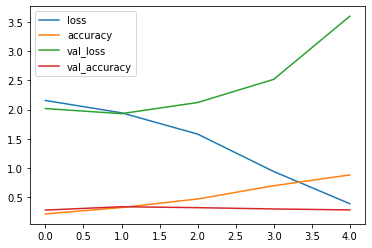

In [9]:
loss_df1.plot()

In [10]:
tf.random.set_seed(42)

train_datagen2 = ImageDataGenerator(rescale=1./255,
                                    rotation_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True)
valid_datagen2 = ImageDataGenerator(rescale=1./255)

train_data2 = train_datagen2.flow_from_directory(r'D:\1jupyter\Datasets\10_food_classes_all_data\train',
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               seed=42)


valid_data2 = valid_datagen2.flow_from_directory(r'D:\1jupyter\Datasets\10_food_classes_all_data\test',
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               seed=42)

model2 = Sequential()

model2.add(Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)))
model2.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model2.add(MaxPool2D(pool_size=2, padding='valid'))
model2.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model2.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model2.add(MaxPool2D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(units=10, activation='softmax'))

model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

hist2 = model2.fit(train_data2,epochs=5, 
                   steps_per_epoch=len(train_data2),
                   validation_data=valid_data2,
                   validation_steps=len(valid_data2))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Epoch 1/5
235/235 [==============================] - 84s 356ms/step - loss: 2.2031 - accuracy: 0.1815 - val_loss: 2.0619 - val_accuracy: 0.2636
Epoch 2/5
235/235 [==============================] - 81s 343ms/step - loss: 2.0970 - accuracy: 0.2472 - val_loss: 1.9462 - val_accuracy: 0.3208
Epoch 3/5
235/235 [==============================] - 80s 340ms/step - loss: 2.0224 - accuracy: 0.2925 - val_loss: 1.9293 - val_accuracy: 0.3328
Epoch 4/5
235/235 [==============================] - 83s 353ms/step - loss: 1.9634 - accuracy: 0.3148 - val_loss: 1.8007 - val_accuracy: 0.3824
Epoch 5/5
235/235 [==============================] - 84s 359ms/step - loss: 1.9337 - accuracy: 0.3336 - val_loss: 1.8186 - val_accuracy: 0.3908


In [11]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 28090)            

In [12]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 28090)            

In [13]:
loss_df2 = pd.DataFrame(hist2.history)

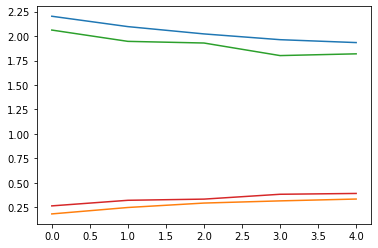

In [16]:
plt.plot(loss_df2)

In [17]:
tf.random.set_seed(42)

train_datagen3 = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
valid_datagen3 = ImageDataGenerator(rescale=1./255)

train_data3 = train_datagen3.flow_from_directory(r'D:\1jupyter\Datasets\10_food_classes_all_data\train',
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               seed=42)


valid_data3 = valid_datagen3.flow_from_directory(r'D:\1jupyter\Datasets\10_food_classes_all_data\test',
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               seed=42)

model3 = Sequential()

model3.add(Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)))
model3.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model3.add(MaxPool2D(pool_size=2, padding='valid'))
model3.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model3.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model3.add(MaxPool2D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(units=10, activation='softmax'))

model3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

hist3 = model3.fit(train_data3,epochs=5, 
                   steps_per_epoch=len(train_data3),
                   validation_data=valid_data3,
                   validation_steps=len(valid_data3))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Epoch 1/5
235/235 [==============================] - 81s 343ms/step - loss: 2.1019 - accuracy: 0.2391 - val_loss: 1.9648 - val_accuracy: 0.2924
Epoch 2/5
235/235 [==============================] - 81s 343ms/step - loss: 1.9633 - accuracy: 0.3131 - val_loss: 1.8981 - val_accuracy: 0.3288
Epoch 3/5
235/235 [==============================] - 80s 340ms/step - loss: 1.8760 - accuracy: 0.3593 - val_loss: 1.8381 - val_accuracy: 0.3648
Epoch 4/5
235/235 [==============================] - 80s 340ms/step - loss: 1.8218 - accuracy: 0.3729 - val_loss: 1.7782 - val_accuracy: 0.3852
Epoch 5/5
235/235 [==============================] - 75s 317ms/step - loss: 1.7574 - accuracy: 0.3959 - val_loss: 1.7365 - val_accuracy: 0.4140


In [20]:
model3.evaluate(valid_data3)

79/79 [==============================] - 6s 79ms/step - loss: 1.7365 - accuracy: 0.4140


[1.7365003824234009, 0.414000004529953]

In [21]:
model2.evaluate(valid_data2)

79/79 [==============================] - 6s 76ms/step - loss: 1.8186 - accuracy: 0.3908


[1.8186302185058594, 0.39079999923706055]

<AxesSubplot:>

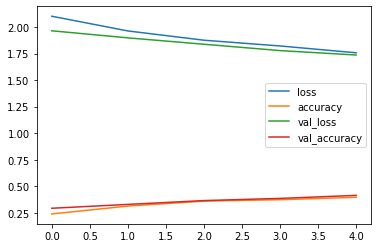

In [22]:
loss_df3 = pd.DataFrame(hist3.history)
loss_df3.plot()

In [23]:
tf.random.set_seed(42)

train_datagen4 = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
valid_datagen4 = ImageDataGenerator(rescale=1./255)

train_data4 = train_datagen4.flow_from_directory(r'D:\1jupyter\Datasets\10_food_classes_all_data\train',
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               seed=42)


valid_data4 = valid_datagen4.flow_from_directory(r'D:\1jupyter\Datasets\10_food_classes_all_data\test',
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               seed=42)

model4 = Sequential()

model4.add(Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)))
model4.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model4.add(MaxPool2D(pool_size=2, padding='valid'))
model4.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model4.add(Conv2D(filters=10, kernel_size=3, activation='relu'))
model4.add(MaxPool2D(pool_size=2))
model4.add(Flatten())
model4.add(Dense(units=10, activation='softmax'))

model4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

hist4 = model4.fit(train_data4,epochs=10, 
                   steps_per_epoch=len(train_data4),
                   validation_data=valid_data4,
                   validation_steps=len(valid_data4))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Epoch 1/10
235/235 [==============================] - 74s 311ms/step - loss: 2.1486 - accuracy: 0.2055 - val_loss: 2.0336 - val_accuracy: 0.2704
Epoch 2/10
235/235 [==============================] - 78s 332ms/step - loss: 1.9521 - accuracy: 0.3147 - val_loss: 1.8998 - val_accuracy: 0.3460
Epoch 3/10
235/235 [==============================] - 79s 335ms/step - loss: 1.8806 - accuracy: 0.3473 - val_loss: 1.7811 - val_accuracy: 0.3796
Epoch 4/10
235/235 [==============================] - 79s 335ms/step - loss: 1.8061 - accuracy: 0.3784 - val_loss: 1.8329 - val_accuracy: 0.3636
Epoch 5/10
235/235 [==============================] - 79s 336ms/step - loss: 1.7577 - accuracy: 0.3991 - val_loss: 1.7091 - val_accuracy: 0.4152
Epoch 6/10
235/235 [==============================] - 79s 336ms/step - loss: 1.7087 - accuracy: 0.4209 - val_loss: 1.7887 - val_accuracy: 0.3924
Epoch 7/10
235/235 [========================

In [24]:
model4.evaluate(valid_data4)

79/79 [==============================] - 6s 77ms/step - loss: 1.6423 - accuracy: 0.4412


[1.6423486471176147, 0.44119998812675476]

<AxesSubplot:>

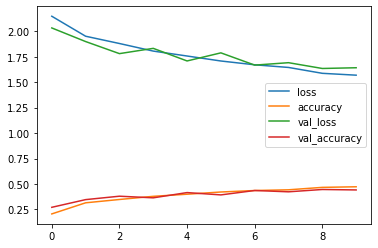

In [25]:
loss_df4 = pd.DataFrame(hist4.history)
loss_df4.plot()

In [26]:
tf.random.set_seed(42)

train_datagen5 = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
valid_datagen5 = ImageDataGenerator(rescale=1./255)

train_data5 = train_datagen5.flow_from_directory(r'D:\1jupyter\Datasets\10_food_classes_all_data\train',
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               seed=42)


valid_data5 = valid_datagen5.flow_from_directory(r'D:\1jupyter\Datasets\10_food_classes_all_data\test',
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               seed=42)

model5 = Sequential()

model5.add(Conv2D(filters=9, kernel_size=3, activation='relu', input_shape=(224,224,3)))
model5.add(Conv2D(filters=9, kernel_size=3, activation='relu'))
model5.add(MaxPool2D(pool_size=2, padding='valid'))
model5.add(Conv2D(filters=9, kernel_size=3, activation='relu'))
model5.add(Conv2D(filters=9, kernel_size=3, activation='relu'))
model5.add(MaxPool2D(pool_size=2))
model5.add(Flatten())
model5.add(Dense(units=10, activation='softmax'))

model5.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

hist5 = model5.fit(train_data5,epochs=20, 
                   steps_per_epoch=len(train_data5),
                   validation_data=valid_data5,
                   validation_steps=len(valid_data5))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Epoch 1/20
235/235 [==============================] - 81s 337ms/step - loss: 2.1731 - accuracy: 0.2007 - val_loss: 2.0065 - val_accuracy: 0.2924
Epoch 2/20
235/235 [==============================] - 81s 345ms/step - loss: 1.9843 - accuracy: 0.3035 - val_loss: 1.9104 - val_accuracy: 0.3360
Epoch 3/20
235/235 [==============================] - 80s 341ms/step - loss: 1.9077 - accuracy: 0.3373 - val_loss: 1.8928 - val_accuracy: 0.3544
Epoch 4/20
235/235 [==============================] - 78s 332ms/step - loss: 1.8353 - accuracy: 0.3661 - val_loss: 1.8783 - val_accuracy: 0.3464
Epoch 5/20
235/235 [==============================] - 78s 331ms/step - loss: 1.7637 - accuracy: 0.3953 - val_loss: 1.8310 - val_accuracy: 0.3816
Epoch 6/20
235/235 [==============================] - 77s 328ms/step - loss: 1.7379 - accuracy: 0.4091 - val_loss: 1.7730 - val_accuracy: 0.3912
Epoch 7/20
235/235 [========================

In [28]:
loss_df5 = pd.DataFrame(hist5.history)

<AxesSubplot:>

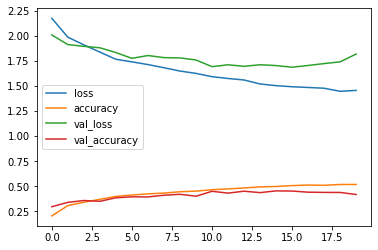

In [29]:
loss_df5.plot()

In [30]:
model5.evaluate(valid_data5)

79/79 [==============================] - 8s 94ms/step - loss: 1.8160 - accuracy: 0.4144


[1.8159528970718384, 0.41440001130104065]